# Transformer

> Implement Transformer's Encoder Layer from scratch

In [6]:
#| default_exp transformer.all

In [7]:
#| hide
from nbdev.showdoc import *

In [11]:
#| hide
import nbdev; nbdev.nbdev_export()

In [9]:
#| export
import torch
from torch import nn

from foundation.transformer.encoder import EncoderLayer, Encoder
from foundation.transformer.embedding import PositionalEncoding, TextEmbedding

Dont understands:
- The flow of encoder and decoder

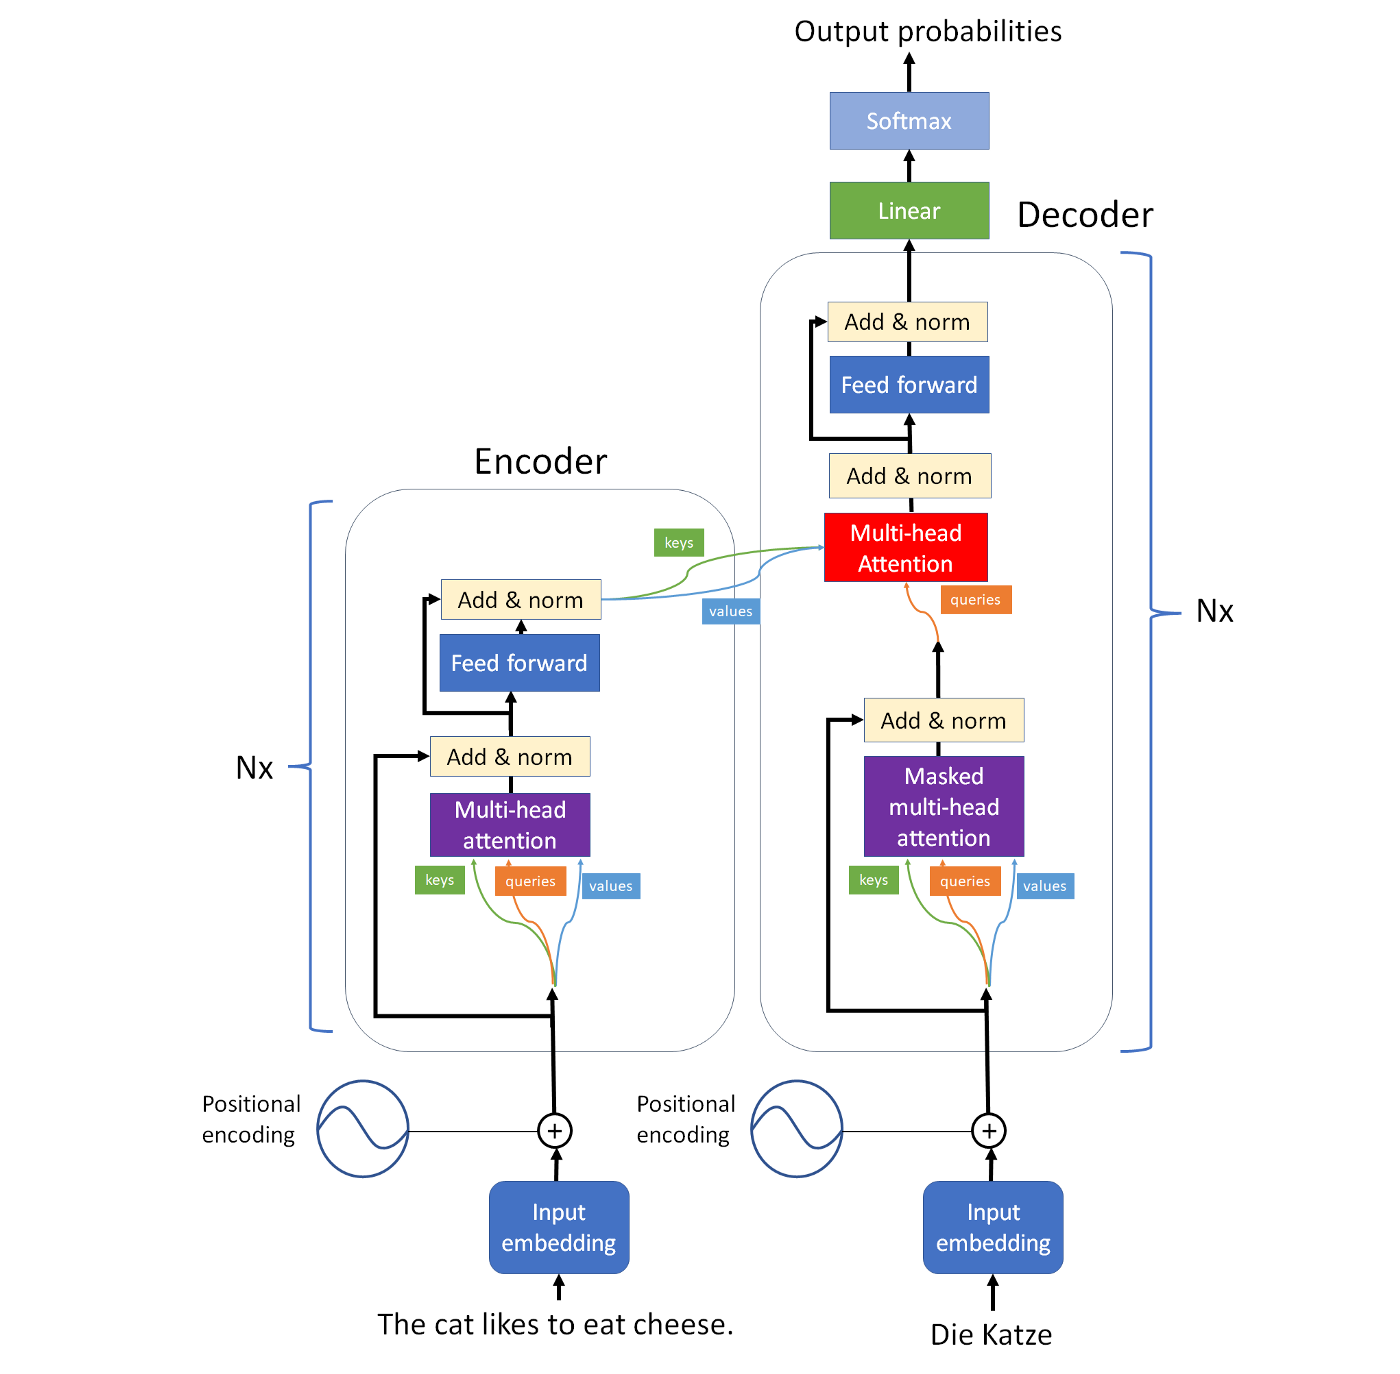

In [ ]:
encoder = EncoderLayer(d_model=4, num_heads=2, d_ff=16)

In [ ]:
toy_encodings = torch.Tensor([[
    [0.0, 0.1, 0.2, 0.3],
    [1.0, 1.1, 1.2, 1.3],
    [2.0, 2.1, 2.2, 2.3]
]]) 

In [ ]:
output, attention_weights = encoder(toy_encodings, mask=None)

In [ ]:
output.shape

torch.Size([1, 3, 4])

In [ ]:
attention_weights.shape

torch.Size([1, 2, 3, 3])

In [ ]:
text_embedding = TextEmbedding(vocab_size=5, padding_idx=0, d_model=4)

In [ ]:
vocabs = ["persistence", "is", "all", "you", "need"]

In [ ]:
vocabs_idx = torch.LongTensor([[1, 2, 3, 4, 0, 0]])

In [ ]:
embeddings = text_embedding(vocabs_idx)

In [ ]:
embeddings

tensor([[[-1.8259,  1.1648, -2.2244, -3.7891],
         [-1.7861, -2.9197,  4.1136, -0.2912],
         [ 0.6952, -0.5996, -4.8600, -1.6284],
         [ 0.5709, -2.5423,  1.7329, -0.9625],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000]]], grad_fn=<MulBackward0>)

In [ ]:
embeddings.shape

torch.Size([1, 6, 4])

In [ ]:
posistional_encoder = PositionalEncoding(d_model=4)

In [ ]:
embeddings_with_position = posistional_encoder(embeddings)

In [ ]:
embeddings_with_position

tensor([[[-2.6084,  3.0926, -3.1777, -3.9844],
         [-1.3495, -0.0000,  5.9217,  0.0000],
         [ 2.2921, -0.0000, -6.8525, -0.9005],
         [ 0.0000, -5.0461,  0.0000,  0.0472],
         [-1.0811, -0.9338,  0.1802,  0.0000],
         [-1.3699,  0.0000,  0.0000,  1.4108]]], grad_fn=<MulBackward0>)

### Encoder

In [ ]:
tokenized_input = torch.LongTensor([[1, 2, 3, 4, 0, 0]])

In [ ]:
encoder = Encoder(
    text_embedding,
    d_model=4, num_heads=2, num_layers=2,
    d_ff=16, dropout=0.3
)

In [ ]:
encoder_output, encoder_attention = encoder(tokenized_input)

In [ ]:
encoder_output

tensor([[[-0.3403, -0.6872,  1.7146, -0.6872],
         [-0.8738,  1.5613, -0.8738,  0.1863],
         [ 0.6281, -1.7217,  0.6942,  0.3994],
         [ 0.0957, -1.2733,  1.5043, -0.3266],
         [ 0.5004,  0.6149,  0.6149, -1.7301],
         [ 0.8419, -1.6156,  0.8236, -0.0499]]],
       grad_fn=<NativeLayerNormBackward0>)

In [ ]:
encoder_output.shape

torch.Size([1, 6, 4])

In [ ]:
encoder_attention.shape

torch.Size([1, 2, 6, 6])

### Transformer

https://youtu.be/JZ9myBCHCME?t=149

- `d_ff`: the hidden size of the linear layer

- `src_pad_idx`: padding token of the input
- `tgt_pad_idx`: padding token of the output

In [12]:
#| export
class Transformer(nn.Module):
    def __init__(
        self,
        src_vocab_len: int, trg_vocab_len: int,
        d_model: int, d_ff: int,
        num_layers: int, num_heads: int,
        src_pad_idx: float, trg_pad_idx: float,
        dropout: float = 0.3,
        efficient_mha: bool = False
    ):
        super().__init__()
        self.num_heads = num_heads
        self.efficient_mha = efficient_mha
        
        encoder_embedding = TextEmbedding(
            vocab_size=src_vocab_len,
            padding_idx=src_pad_idx,
            d_model=d_model
        )
        decoder_embedding = TextEmbedding(
            vocab_size=trg_vocab_len,
            padding_idx=trg_pad_idx,
            d_model=d_model
        )
        